# Python for Financial Analysis and Algorithmic Trading

# 06 - Pandas with Time Series Data

* DateTime Index
* Time Resampling
* Time Shifts
* Rolling and Expanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_seconds = 15

In [4]:
my_date = datetime(my_year, my_month, my_day)
my_date

datetime.datetime(2017, 1, 2, 0, 0)

In [5]:
type(my_date)

datetime.datetime

## Time Resampling

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# import Walmart stock data
df = pd.read_csv("./data/walmart_stock.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [8]:
df.info()  
# Date         1258 non-null object
# we should convert to datetime obj

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   int64         
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [11]:
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
...,...,...,...,...,...,...
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087


In [12]:
# reREad Walmart stock data
df = pd.read_csv("./data/walmart_stock.csv",
                index_col ='Date',
                parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [13]:
# A - year
# B - Business Days freq
df.resample(rule='A').mean() # get mean of each year end

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


In [14]:
df.resample(rule='Q').mean() # get mean of each quarter

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-30,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-30,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-31,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-30,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [15]:
df.resample(rule='BQ').mean() # get mean of each Business quarter

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-30,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-29,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-28,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-29,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-28,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [16]:
df.resample(rule='A').max() # get max price of each year

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,77.599998,77.599998,76.690002,77.150002,38007300,68.568371
2013-12-31,81.209999,81.370003,80.820000,81.209999,25683700,73.929868
2014-12-31,87.080002,88.089996,86.480003,87.540001,22812400,81.707680
2015-12-31,90.800003,90.970001,89.250000,90.470001,80898100,84.914216
2016-12-31,74.500000,75.190002,73.629997,74.300003,35076700,73.233524


In [17]:
def first_day(entry):
    return entry[0]

In [18]:
df.resample(rule='A').apply(first_day) # get the first day of each year

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


<AxesSubplot:xlabel='Date'>

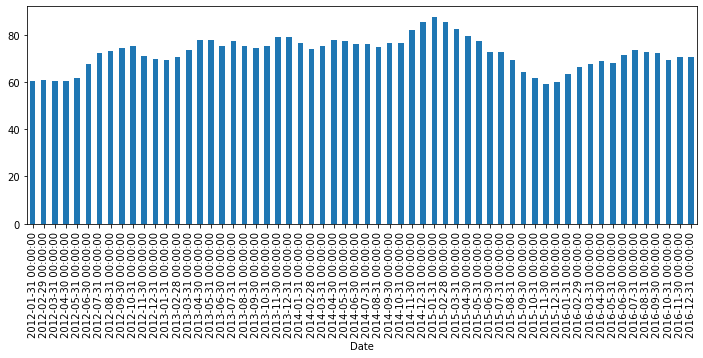

In [19]:
df['Close'].resample('M').mean().plot(kind='bar',  figsize=(12,4)) # M Monthly average

### Time Shifting

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# import Walmart stock data
df = pd.read_csv("./data/walmart_stock.csv",
                index_col =('Date'),
                parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [22]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456
2016-12-30,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


In [23]:
df.shift(periods = 1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


In [24]:
#Signature: df.tshift(periods=1, freq=None, axis=0)
# Shift the time index, using the index's frequency if available. 
#
df.tshift(freq='A').head()

<ipython-input-24-fb5dc926dfce>:4: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df.tshift(freq='A').head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-12-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-12-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-12-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-12-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


### Rolling and Expanding

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# import Walmart stock data
df = pd.read_csv("./data/walmart_stock.csv",
                index_col =('Date'),
                parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


<AxesSubplot:xlabel='Date'>

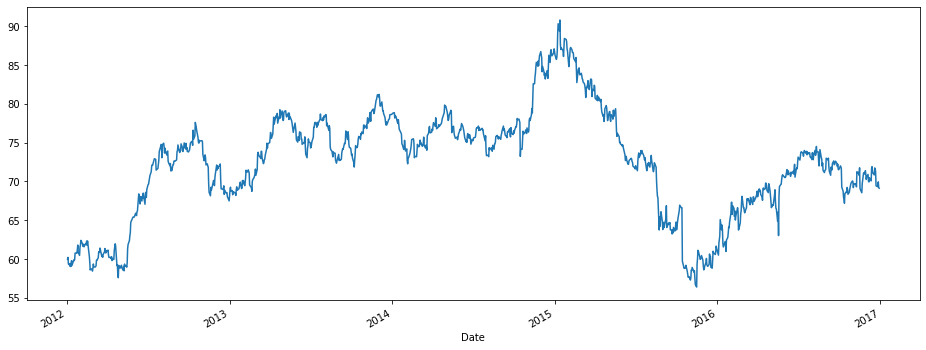

In [27]:
df['Open'].plot(figsize = (16,6))

In [28]:
# moving average
# df.rolling(
#     window,
#     min_periods=None,
#     center=False,
#     win_type=None,
#     on=None,
#     axis=0,
#     closed=None,
# )

In [29]:
df.rolling(window=7).mean().head(14);

<AxesSubplot:xlabel='Date'>

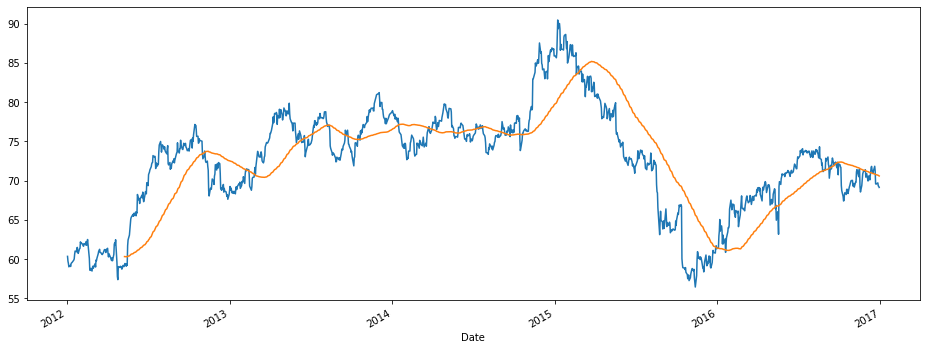

In [30]:
df['Close'].plot()
df.rolling(window=90).mean()['Close'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

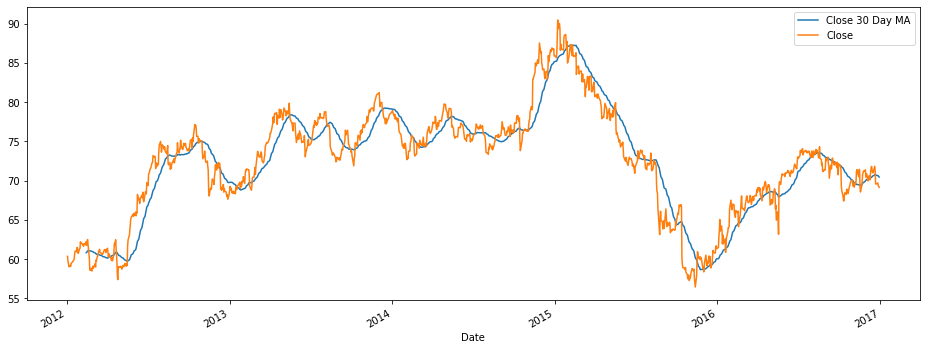

In [31]:
# Let's add the moving average column to df
df['Close 30 Day MA'] = df['Close'].rolling(window=30).mean()

df[['Close 30 Day MA', 'Close']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

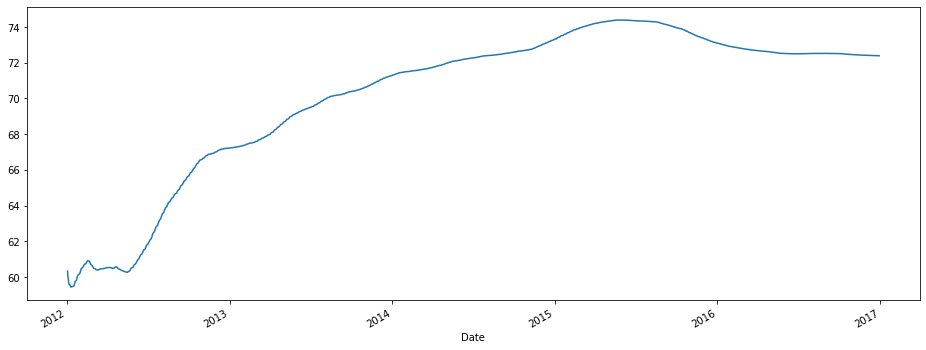

In [32]:
# Expanding Method
# everything from the beginning of time series

df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

### Bollinger Bands

<AxesSubplot:xlabel='Date'>

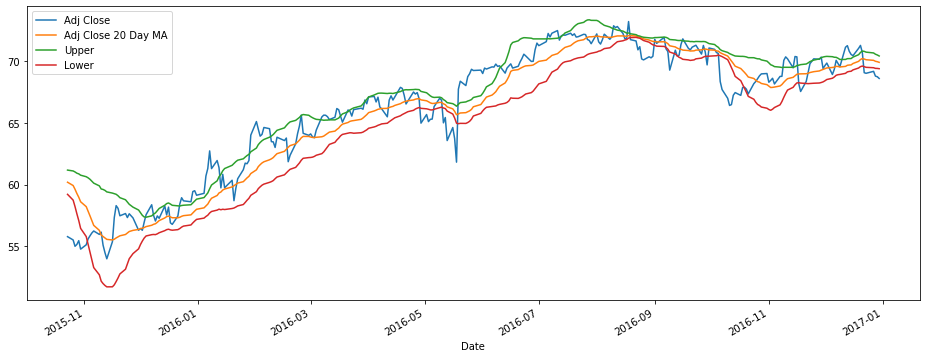

In [33]:
# put volatility bands above and below the mean
# 20day mean

# Adj Close 20 MA
df['Adj Close 20 Day MA'] = df['Adj Close'].rolling(window=20).mean()

# Upper Band = + 2 stdev 
df['Upper'] = df['Adj Close 20 Day MA'] + 2 * df['Adj Close 20 Day MA'].rolling(window=20).std()

# Lower Band = - 2 stdev
df['Lower'] = df['Adj Close 20 Day MA'] - 2 * df['Adj Close 20 Day MA'].rolling(window=20).std()

# plot
df[['Adj Close', 'Adj Close 20 Day MA', 'Upper', 'Lower']].tail(300).plot(figsize=(16,6))

In [34]:
df.drop(['Close 30 Day MA'], axis=1)

,Open,High,Low,Close,Volume,Adj Close,Adj Close 20 Day MA,Upper,Lower
Date,,,,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235,NaN,NaN,NaN
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475,NaN,NaN,NaN
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539,NaN,NaN,NaN
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220,NaN,NaN,NaN
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411,70.133490,70.749509,69.517471
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240,70.084644,70.684511,69.484777
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087,70.007569,70.581972,69.433167


# END OF CHAPTER